In [1]:
#check frequencies of the tempalate

import matplotlib.pyplot as plt 

from constants import *
from template import *
from GW_class import *


#print template frequencies 
print(waveform.freqs)
#print frequency spacing
print('frequency spacing:', (waveform.df))
print('sampling rate:' ,(waveform.sampling_freq))
print('Number of time samples:', waveform.Nt)



#create time domain waveform
FD_template= waveform.get_FD_waveform(params_inj, phic=3.035)
TD_template= waveform.iFFT_waveform(FD_template)


#go back to FD to check freqs
TD_to_FD = np.fft.fft(TD_template)
freqs_from_TD = np.fft.fftfreq(len(TD_template), d=1/waveform.sampling_freq)


print(FD_template)
print(TD_template)

print(freqs_from_TD)
#plt.plot(waveform.times, TD_template)



/Users/pipermorris/Library/Python/3.9/lib/python/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


[0.00000000e+00 2.50015260e-01 5.00030519e-01 ... 2.04737496e+03
 2.04762498e+03 2.04787499e+03]
frequency spacing: 0.2500152597204419
sampling rate: 4095.7499847402796
Number of time samples: 2622
[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
[-2.47775274e-24 -2.47724373e-24 -2.47343733e-24 ... -2.45958405e-24
 -2.46890996e-24 -2.47497118e-24]
[ 0.          0.25001526  0.50003052 ... -0.75004578 -0.50003052
 -0.25001526]


In [2]:
#check frequencies of GW150914

from get_data import *
from numpy.fft import rfftfreq, rfft

#choose detector 
det= 'H1'
#get time domain info from dictionary
dt = GW150914_data['dt']
fs = GW150914_data['fs']
strain = GW150914_data[det]['strain']
N = len(strain)

print('number of samples:', N)
print('sampling rate', fs)

#check frequency spacing
print('frequency spacing:', fs/N)
#fft to get freqs 
freqs_150914= rfftfreq(N,dt)
print(f'GW150914 frequencies:', freqs_150914)





number of samples: 131072
sampling rate 4096
frequency spacing: 0.03125
GW150914 frequencies: [0.00000000e+00 3.12500000e-02 6.25000000e-02 ... 2.04793750e+03
 2.04796875e+03 2.04800000e+03]


In [7]:
#double check with matched filter frequencies

from matched_filter import *
from constants import signal_ref_params

#choose detector
det= 'H1'
data=  GW150914.dictionary[det]['strain']


# #check GW150914
# SNRmax, timemax, d_eff, horizon, phase, offset= matched_filter(
#     get_template(signal_ref_params['GW150914'][1], GW150914.dictionary),  
#     GW150914.dictionary[det]['strain'],   
#     GW150914.dictionary['time'],   
#     GW150914.dictionary['large_data_psds'][det],      
#     GW150914.dictionary['fs']        )

template= get_template(signal_ref_params['GW150914'][1], GW150914.dictionary)
time_template = np.fft.irfft(template)

print(template_FD)
calculate_matched_filter(get_template(signal_ref_params['GW150914'][1], GW150914.dictionary), GW150914.dictionary, det = 'H1')


template_wbp, strain_whitenbp, times, SNRmax, amp, phase = wrapped_matched_filter(signal_ref_params['GW150914'][1], GW150914, det = 'H1')



print('ifft template:', np.max(time_template))
print('template:', np.max(template))
print('amplitude', amp)

import matplotlib.pyplot as plt


plt.plot(times, strain_whitenbp)
plt.plot(times, template_wbp)

AttributeError: 'GWSignals' object has no attribute 'get_FD_waveform'

(0.3, 0.5)

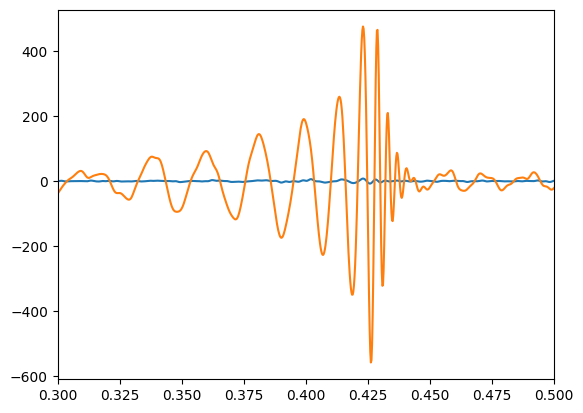

In [4]:


import matplotlib.pyplot as plt

plt.plot(times, strain_whitenbp)
plt.plot(times,  template_wbp)
plt.xlim(0.3, 0.5)

In [5]:
dt = GW150914_data['dt']
fs = GW150914_data['fs']



0.00032873280950034657
672.2276314269212


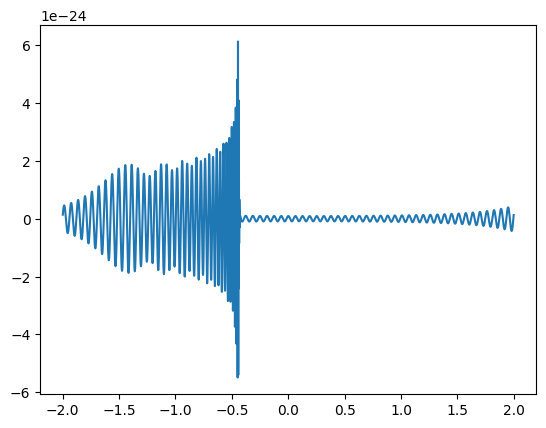

In [6]:
fig_template_tapered= get_template(signal_ref_params['GW150914'][1], GW150914.dictionary)


# Assuming 'data' is your dataset (e.g., a NumPy array)
mean_vector = np.mean(template_wbp, axis=0) # Calculate mean of each feature
covariance_matrix = np.cov(template_wbp, rowvar=False) # Calculate covariance matrix
print(mean_vector)
print(covariance_matrix)


# Check if mean_vector elements are close to zero
# Check if covariance_matrix is close to an identity matrix

FD_tapered = np.fft.irfft(fig_template_tapered, n = len(fig_template_tapered)*2-1)
FD_tapered = np.roll(FD_tapered, -10000)
plt.plot(times, FD_tapered)
#plt.xlim(-0.3, 0.1)